# Test scripts for the watercolorist app

To Do:
1. Collect pigment information from websites and merge into single database
    a. Data base must have the pigment#, color name, manufacturer (limit to 3 major manufacturers(Daniel Smith, M  Graham & Windsor Newton)
    b. Generate HSV or RGB profiles for swatches of pure pigments and merge to pigment database
    c. Generate HSV or RGB profiles for common color mixes from web images for 
        1. neutrals
        2. greens
        3. skintones
2. Segment image into color zones using K-means clustering
    a. Generate HSV or RGB profiles for color zones
        1. Must ignore white
    b. Use K-Means clustering on each segment to match to colors in database
        1. Return the "convience color" and "mixed color match"
            a. return should have image of closest matches from all three manufacturers starting with the closest for both the mix and the convience color
            b. return price information 
            c. return toxicity, color-fastness, pigment number
            
3. Possibly allow the user to prioritize one of the features?
4. Maybe link to videos or images of tutorial on painting the topic of what they are painting? Flowers, birds, portaits?
5. Maybe link to swatching videos or reviews of pigments?


Feedback - Need to focus on one thing, scope.
limit to one manufacturer at first
skip the tensorflow
find different segmentation method then k-means


My thoughts
I need to deal with saturation, can this be simulated?


Test with one pure and one mixed pigments at different value scales. 

##inital steps
Color clusering - 
1. scrape the 88 5ml colors from the daniel smith website
2. get hsv or rgb colors for swatch
3. label with general colors for primary and secondary colors. hot encoding
4. can I just use a linear model??? find the point closest to it based on the hsv or rgb values???? return value with the smallest distance? Sounds like a cross-validate!
4. Test/train to to see which classifier can group colors with highest accuracy
5. Test with new set of swatches from the internet

Color identification
1. find best way to identify colors meaningfully, how many segments??? Which model
2. Test initially on color wheel using known pigments
3. Try to match labeled segmented regions of known pigments to the color model
4. 
        


## 1. Web scraping information from manufacturers websites
Daniel Smith 150 primary colors - ignore perlecent colors

Using Chrome the webpages are organized as:
danielsmith.com/color-name-5ml-tube-daniel-smith-extra-fine-watercolor/
The color names are the only things that change - get list and generate for loop to create automated downloads

Tag for the image is:
<meta property="og:image" content="http://danielsmith.com/wp-content/uploads/284610009_112817.jpg" />

Tag for the information is:
<div id="post-2100" class="section section-post-content post-2100 post type-post status-publish format-standard has-post-thumbnail hentry category-product category-wc5ml lightfastness-all lightfastness-lightfastness-i-excellent granulation-all granulation-granulation-granulating staining-all staining-staining-1-non-staining transparency-all transparency-transparency-semi-opaque colorfamily-all colorfamily-white colorfamily-yellow type-all">
	<div class="section the_content"><div class="section_wrapper"><div class="the_content_wrapper"><p>Spatter or drop a brushload of Buff Titanium into a moist wash and enjoy the pigment displacement, it is especially effective used that way to make clouds in the sky. Unique to DANIEL SMITH, Buff Titanium resembles the ecru shades of sand and antique lace and simulates the porous texture of an eggshell. It is a most welcome neutral, with its&#8217; semi-transparent to opaque, non-staining properties. Pre-mix Buff Titanium with Quinacridone Rose or Perinone Orange for subtle hues and matte surfaces ideal for the velvety petals of your favorite flowers. Mix with Indigo or Van Dyke Brown to create slate-colored shadows and soft feathers. Glaze a dried landscape with a misty, atmospheric mood.</p>
<p>SKU: 284610009<br />
Pigment: PW 6:1 | Series: 1<br />
Lightfastness: I &#8211; Excellent<br />
Transparency: Semi-Opaque<br />
Staining: 1-Non-Staining<br />
Granulation: Granulating</p>

In [4]:
import requests
from bs4 import BeautifulSoup

In [21]:
#url of the watercolor page - this will be turned into a function later
url = "http://danielsmith.com/buff-titanium-5ml-tube-daniel-smith-extra-fine-watercolor/"

webpage_response = requests.get(url, "html.parser")
soup = BeautifulSoup(webpage_response.content)
print(soup)

<!DOCTYPE html>
<!--[if lt IE 7 ]><html class="ie ie6" lang="en"> <![endif]--><!--[if IE 7 ]><html class="ie ie7" lang="en"> <![endif]--><!--[if IE 8 ]><html class="ie ie8" lang="en"> <![endif]--><!--[if (gte IE 9)|!(IE)]><!--><html lang="en-US"> <!--<![endif]-->
<!-- head -->
<head>
<!-- meta -->
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>
<title>Buff Titanium 5ml Tube - DANIEL SMITH Extra Fine Watercolor - DANIEL SMITHDANIEL SMITH</title>
<link href="http://danielsmith.com/wp-content/uploads/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<!-- wp_head() -->
<script>
//<![CDATA[
window.mfn_slider_vertical	= { autoplay:10000 	};
window.mfn_slider_portfolio 	= { autoPlay:0 };
//]]>
</script>
<!-- This site is optimized with the Yoast SEO plugin v13.0 - https://yoast.com/wordpress/plugins/seo/ -->
<meta content="max-snippet:-1, max-image-preview:large, max-vide

Extract the title

In [24]:
title = soup.title.string
print(title)
#the title will need to be parsed

Buff Titanium 5ml Tube - DANIEL SMITH Extra Fine Watercolor - DANIEL SMITHDANIEL SMITH


Get the image

In [25]:
meta = soup.find(property="og:image")

In [31]:
print(meta.attrs)

{'property': 'og:image', 'content': 'http://danielsmith.com/wp-content/uploads/284610009_112817.jpg'}


In [32]:
image_url = meta['content']

In [33]:
print(image_url)

http://danielsmith.com/wp-content/uploads/284610009_112817.jpg


In [35]:
#once the title is parsed it can be used to iterate the picname
with open('buff.jpg', 'wb') as handle:
        response = requests.get(image_url, stream=True)

        if not response.ok:
            print (response)

        for block in response.iter_content(1024):
            if not block:
                break

            handle.write(block)

In [36]:
from PIL import Image

In [37]:
image = Image.open('buff.jpg')

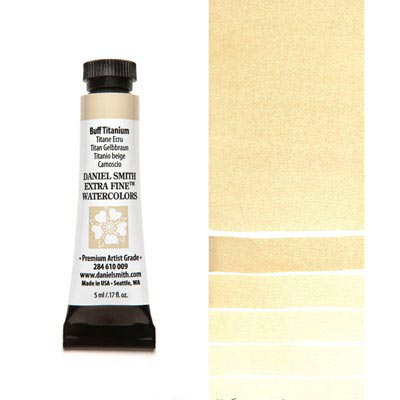

In [38]:
image

get the pigment information

In [58]:
info = soup.find_all('p')

In [59]:
print(info)

[<p class="text"></p>, <p>Spatter or drop a brushload of Buff Titanium into a moist wash and enjoy the pigment displacement, it is especially effective used that way to make clouds in the sky. Unique to DANIEL SMITH, Buff Titanium resembles the ecru shades of sand and antique lace and simulates the porous texture of an eggshell. It is a most welcome neutral, with its’ semi-transparent to opaque, non-staining properties. Pre-mix Buff Titanium with Quinacridone Rose or Perinone Orange for subtle hues and matte surfaces ideal for the velvety petals of your favorite flowers. Mix with Indigo or Van Dyke Brown to create slate-colored shadows and soft feathers. Glaze a dried landscape with a misty, atmospheric mood.</p>, <p>SKU: 284610009<br/>
Pigment: PW 6:1 | Series: 1<br/>
Lightfastness: I – Excellent<br/>
Transparency: Semi-Opaque<br/>
Staining: 1-Non-Staining<br/>
Granulation: Granulating</p>, <p><a href="https://www.dropbox.com/s/3ovuz33tr7um6o3/284600000-284640999%20Extra%20Fine%20Wate

In [62]:
import re

All of this needs to be iterated in a function

In [63]:
soup.find(string=re.compile("Pigment"))

'\nPigment: PW 6:1 | Series: 1'

In [65]:
soup.find(string=re.compile("Lightfastness"))

'\nLightfastness: I – Excellent'

In [66]:
soup.find(string=re.compile("Transparency"))

'\nTransparency: Semi-Opaque'

In [67]:
soup.find(string=re.compile("Staining"))

'\nStaining: 1-Non-Staining'

K-means clustering segmentation

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

(180, 91, 3)


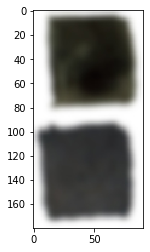

In [3]:
image = plt.imread('two_gray_blur.jpg')
print(image.shape)
plt.imshow(image)


In [4]:
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [5]:
image_n = image.reshape(image.shape[0]*image.shape[1], image.shape[2])
image_n.shape

(16380, 3)

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(image_n)
image2show = kmeans.cluster_centers_[kmeans.labels_]

In [7]:

cluster_image.shape

NameError: name 'cluster_image' is not defined

In [86]:
cluster_image.astype(int)

array([[[133, 153,  81],
        [133, 153,  81],
        [133, 153,  81],
        ...,
        [133, 153,  81],
        [133, 153,  81],
        [133, 153,  81]],

       [[133, 153,  81],
        [133, 153,  81],
        [133, 153,  81],
        ...,
        [133, 153,  81],
        [133, 153,  81],
        [133, 153,  81]],

       [[133, 153,  81],
        [133, 153,  81],
        [133, 153,  81],
        ...,
        [133, 153,  81],
        [133, 153,  81],
        [133, 153,  81]],

       ...,

       [[133, 153,  81],
        [133, 153,  81],
        [133, 153,  81],
        ...,
        [133, 153,  81],
        [133, 153,  81],
        [133, 153,  81]],

       [[133, 153,  81],
        [133, 153,  81],
        [133, 153,  81],
        ...,
        [133, 153,  81],
        [133, 153,  81],
        [133, 153,  81]],

       [[133, 153,  81],
        [133, 153,  81],
        [133, 153,  81],
        ...,
        [133, 153,  81],
        [133, 153,  81],
        [133, 153,  81]]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


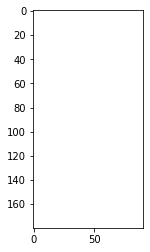

In [10]:
cluster_image = image2show.reshape(image.shape[0], image.shape[1], image.shape[2])
cluster_image.astype(int)
plt.imshow(cluster_image)

In [11]:
int_image = cluster_image.astype(int)

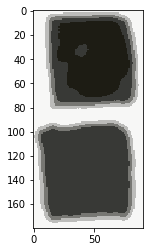

In [12]:
plt.imshow(int_image)

In [96]:
plt.savefig('segment_gold', format='jpg')

<Figure size 432x288 with 0 Axes>